In [1]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



- **Question 6: ** Create a weighted undirected movie network using equation 2. Plot the degree distribution of the movie network. Briefly comment on the degree distribution.

In [2]:
edgeList <- read.csv(file="eggs.csv", header=TRUE, sep=",")

In [3]:
cast_g <- graph_from_data_frame(edgeList, directed = FALSE)

In [4]:
max(degree(cast_g))

[1] 14471

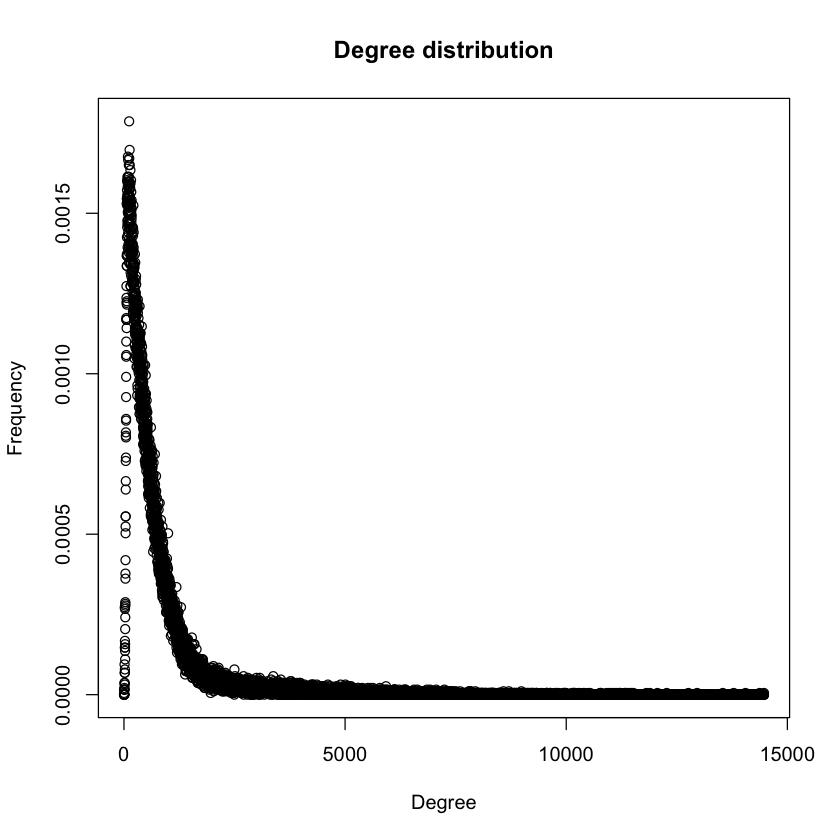

In [5]:
plot(degree.distribution(cast_g), xlab="Degree",ylab="Frequency",
         main=paste0("Degree distribution"))

- **Question 7: ** Use the Fast Greedy community detection algorithm to find the communities in the movie network. Pick 10 communities and for each community plot the distribution of the genres of the movies in the community.

In [ ]:
# create network using edgeList
g <- graph_from_data_frame(edgeList, directed = FALSE)
# fg <- fastgreedy.community(g)

- **Question 9:** For each of the movies listed above, extract it’s neighbors and plot the distribution of the available ratings of the movies in the neighborhood. Is the average rating of the movies in the neighborhood similar to the rating of the movie whose neighbors have been extracted? In this question, you should have 3 plots.

In [6]:
ratings <- read.csv(file="movie_rating_mod.csv", header=TRUE, sep=",")

[1] 6.381033


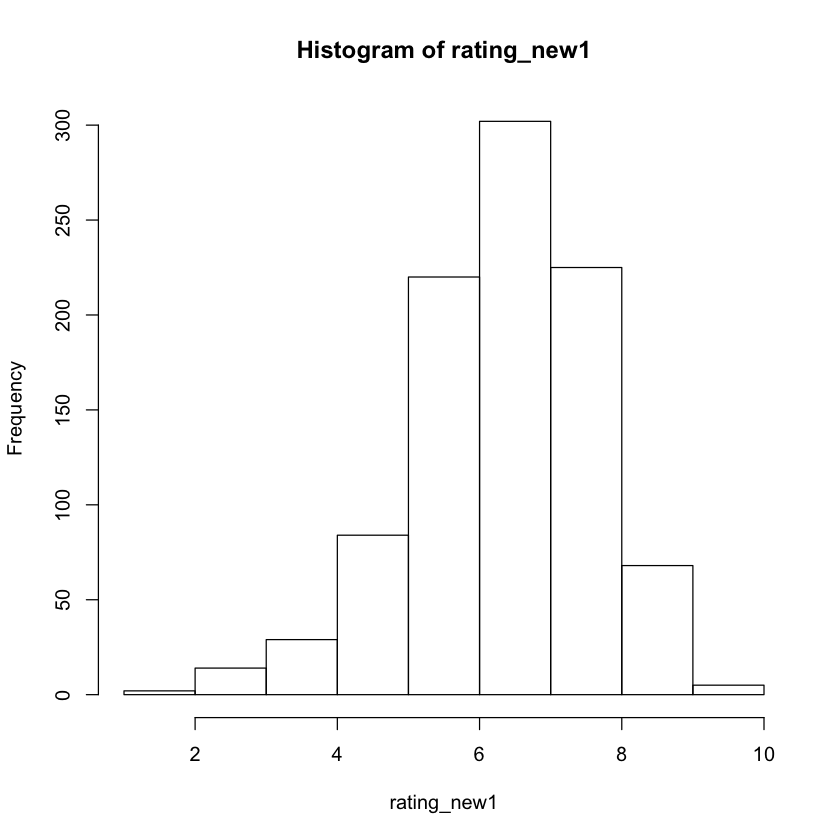

In [7]:
# Batman v Superman: Dawn of Justice
vertex1 = V(cast_g)[which(V(cast_g)$name == 43606)]
neighbors1 = neighbors(cast_g, vertex1)
n1 = length(names(neighbors1))
rating_all1 = matrix(0, 1, n1)
for (i in seq(n1)){
    id = as.numeric(names(neighbors1)[i])
    if (id %in% ratings$m){
        rate = ratings$r[which(ratings$m == id)]
        rating_all1[i] = rate
    }
}
rating_new1 = rating_all1[-which(rating_all1 == 0)]
print(mean(rating_new1))
hist(rating_new1)

[1] 6.312097


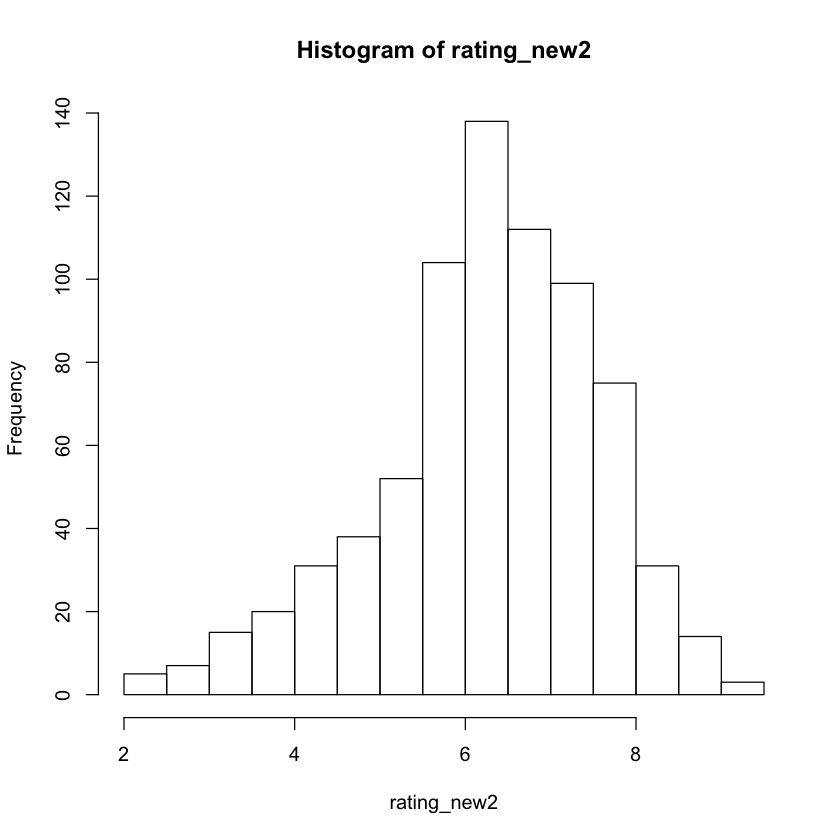

In [8]:
vertex2 = V(cast_g)[which(V(cast_g)$name == 218463)]
neighbors2 = neighbors(cast_g, vertex2)
n2 = length(names(neighbors2))
rating_all2 = matrix(0, 1, n2)
for (i in seq(n2)){
    id = as.numeric(names(neighbors2)[i])
    if (id %in% ratings$m){
        rate = ratings$r[which(ratings$m == id)]
        rating_all2[i] = rate
    }
}
rating_new2 = rating_all2[-which(rating_all2 == 0)]
print(mean(rating_new2))
hist(rating_new2)

[1] 6.768975


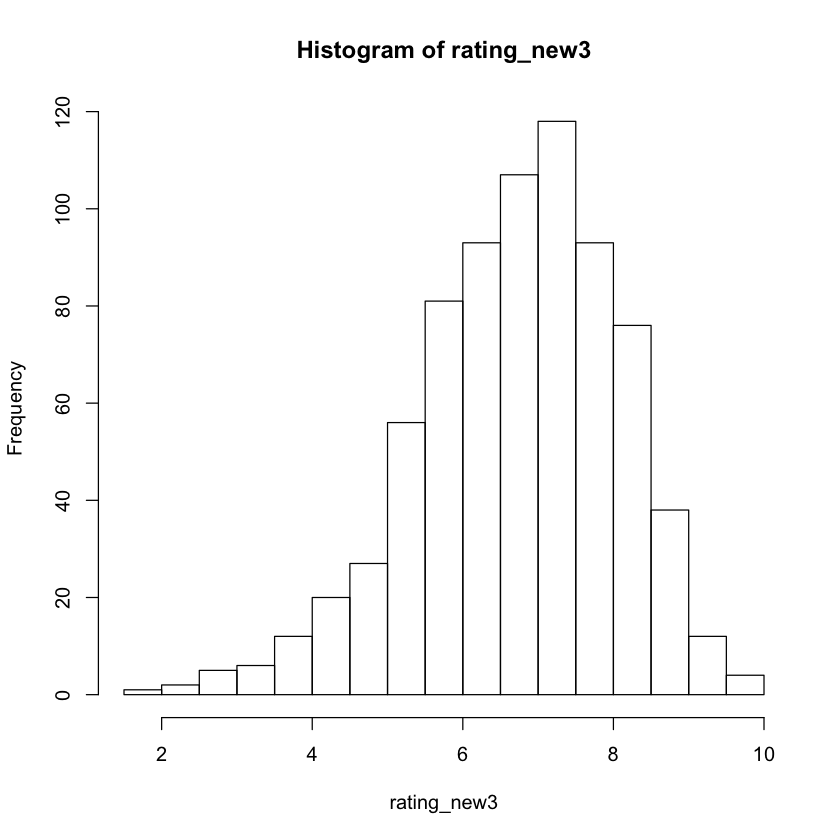

In [9]:
vertex3 = V(cast_g)[which(V(cast_g)$name == 321465)]
neighbors3 = neighbors(cast_g, vertex3)
n3 = length(names(neighbors3))
rating_all3 = matrix(0, 1, n3)
for (i in seq(n3)){
    id = as.numeric(names(neighbors3)[i])
    if (id %in% ratings$m){
        rate = ratings$r[which(ratings$m == id)]
        rating_all3[i] = rate
    }
}
rating_new3 = rating_all3[-which(rating_all3 == 0)]
print(mean(rating_new3))
hist(rating_new3)

- **Question 10:** Repeat question 10, but now restrict the neighborhood to consist of movies from the same community. Is there a better match between the average rating of the movies in the restricted neighborhood and the rating of the movie whose neighbors have been extracted. In this question, you should have 3 plots.

In [ ]:
fg = fastgreedy.community(cast_g)

Batman v Superman: Dawn of Justice (2016)


In [ ]:
# movieid = 43606, refer to vertex1
#community_nodes = c(as.numeric(groups(fg)[membership(fg)[vertex]]$'4'))
community_node1 = groups(fg)[membership(fg)[vertex1]]

In [ ]:
neighbor_node1 = c(as.numeric(names(neighbors1)))
node_new1 = intersect(neighbor_node1, community_node1)
n1 = length(node_new1)
rating_all_new1 = matrix(0, 1, n1)
for (i in seq(n1)){
    id = node_new1[i]
    if (id %in% ratings$m){
        rate = ratings$r[which(ratings$m == id)]
        rating_all_new1[i] = rate
    }
}
rating_new_1 = rating_all_new1[-which(rating_all_new1 == 0)]
print(mean(rating_new_1))
hist(rating_new_1)

Mission: Impossible – Rogue Nation (2015)

In [ ]:
# movieid = 218463, refer to vertex2
community_node2 = groups(fg)[membership(fg)[vertex2]]

In [ ]:
neighbor_node2 = c(as.numeric(names(neighbors2)))
node_new2 = intersect(neighbor_node2, community_node2)
n2 = length(node_new2)
rating_all_new2 = matrix(0, 1, n2)
for (i in seq(n2)){
    id = node_new2[i]
    if (id %in% ratings$m){
        rate = ratings$r[which(ratings$m == id)]
        rating_all_new2[i] = rate
    }
}
rating_new_2 = rating_all_new2[-which(rating_all_new2 == 0)]
print(mean(rating_new_2))
hist(rating_new_2)

Minions (2015)

In [ ]:
# movieid = 321465, refer to vertex3
community_node3 = groups(fg)[membership(fg)[vertex3]]

In [ ]:
neighbor_node3 = c(as.numeric(names(neighbors3)))
node_new3 = intersect(neighbor_node3, community_node3)
n3 = length(node_new3)
rating_all_new3 = matrix(0, 1, n3)
for (i in seq(n3)){
    id = node_new3[i]
    if (id %in% ratings$m){
        rate = ratings$r[which(ratings$m == id)]
        rating_all_new3[i] = rate
    }
}
rating_new_3 = rating_all_new3[-which(rating_all_new3 == 0)]
print(mean(rating_new_3))
hist(rating_new_3)

- **Question 11**: For each of the movies listed above, extract it’s top 5 neighbors and also report the community membership of the top 5 neighbors. In this question, the sorting is done based on the edge weights.

Batman v Superman: Dawn of Justice (2016)

In [10]:
weight1 = E(cast_g)[from(vertex1)]$weight

In [23]:
neighbor_node1 = c(as.numeric(names(neighbors1)))
weight1_sorted = sort(weight1, decreasing = TRUE)
neighbor_node_new1 = matrix(0, 1, 5)
for (i in seq(5)){
   neighbor_node_new1[i] = neighbor_node1[which(weight1 == weight1_sorted[i])]
}
neighbor_node_new1

190047,74460,143540,224213,271327


In [ ]:
# report the community membership of the above five neighbors

Mission: Impossible - Rogue Nation (2015)

In [19]:
weight2 = E(cast_g)[from(vertex2)]$weight

In [20]:
neighbor_node2 = c(as.numeric(names(neighbors2)))
weight2_sorted = sort(weight2, decreasing = TRUE)
neighbor_node_new2 = matrix(0, 1, 5)
for (i in seq(5)){
   neighbor_node_new2[i] = neighbor_node2[which(weight2 == weight2_sorted[i])]
}
neighbor_node_new2

330603,324693,62532,179320,109348


In [ ]:
# report the community membership of the above five neighbors

Minions (2015)

In [21]:
weight3 = E(cast_g)[from(vertex3)]$weight

In [22]:
neighbor_node3 = c(as.numeric(names(neighbors3)))
weight3_sorted = sort(weight3, decreasing = TRUE)
neighbor_node_new3 = matrix(0, 1, 5)
for (i in seq(5)){
   neighbor_node_new3[i] = neighbor_node3[which(weight3 == weight3_sorted[i])]
}
neighbor_node_new3

191427,253212,273911,131445,183322


In [ ]:
# report the community membership of the above five neighbors